# K Nearest Neighbors

Is a supervised ML algorithm that can be used for Regression and for Classification. The KNN algorithm **calculate the distances** between the data to the other trained data known as **Eucladean distances **, then select the K-neighbours more closer to the new data point and assign to the new data point the category with the maximun number of neighbours closer it has. 

In the following dataset we are going to predict if the cancer is benign (2) or in the other case if is malignant (4)

In [74]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_validate, train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer-wisconsin.data.txt to breast-cancer-wisconsin.data.txt


In [8]:
df = pd.read_csv("breast-cancer-wisconsin.data.txt", header=None)

In [11]:
df.columns = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", 
              "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

In [12]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [13]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [14]:
df = df.drop(["Sample code number"],1)

In [15]:
df.replace("?", -99999, inplace=True)

In [16]:
Y = df["Class"]

In [28]:
X = df.iloc[:, 0:9]

In [29]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [36]:
Y.value_counts()

2    458
4    241
Name: Class, dtype: int64

# Clasificador de los K vecinos

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [38]:
clf = neighbors.KNeighborsClassifier()

In [52]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
accuracy = clf.score(X_test,y_test)
accuracy*100

97.14285714285714

In [54]:
prediction = clf.predict(X_test)

In [64]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual,2,4
prediction,,
2,88,3
4,1,48


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98        89
           4       0.98      0.94      0.96        51

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



##Find optimal K value

### Error rate VS K value

Minimum error:- 0.02142857142857143 at K = 6


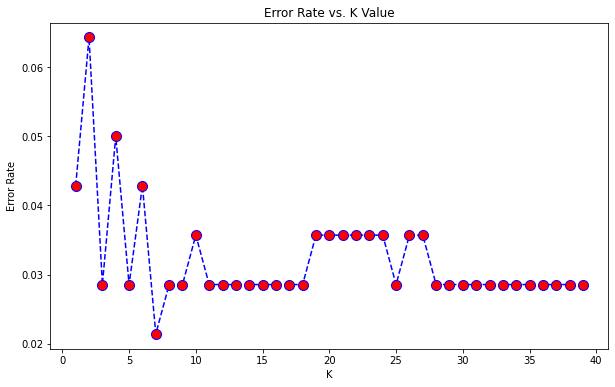

In [75]:
error_rate = []
for i in range(1,40):
 knn = neighbors.KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
 
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

### Accuracy VS K value

Maximum accuracy:- 0.9785714285714285 at K = 6


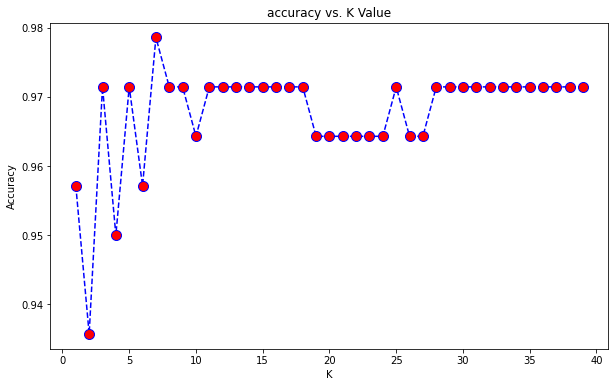

In [77]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = neighbors.KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))